### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from mpmath import mpf
import matplotlib.pyplot as plt

### Reading and preparing dataset with only 2,3,4 containing clusters

In [2]:
D = pd.read_csv('mnist234.csv')
D = D.drop(D.columns[0], axis = 1)
X = D.groupby(['label'])
K = 3
Y = list(X)
X1 = Y[0][1].iloc[:,1:]//128
Y1 = Y[0][1].iloc[:,0]
X2 = Y[1][1].iloc[:,1:]//128
Y2 = Y[1][1].iloc[:,0]
X3 = Y[2][1].iloc[:,1:]//128
Y3 = Y[2][1].iloc[:,0]
X = pd.concat([X1,X2,X3])
X['label'] = pd.concat([Y1,Y2,Y3])
Y = list(X['label'])
X = X.iloc[:,:-1].to_numpy()
N = len(X)

### Randomly assigning means and and probabilities and normalising them

In [4]:
# random no. assigning
# Mu = np.random.rand(3,784)
Mu=[]
for i in range(3):
    Mu.append(np.random.uniform(0.25,0.76,784))

P = np.random.rand(3)
P = P/sum(P)
Mu[0] = Mu[0]/sum(Mu[0])
Mu[2] = Mu[2]/sum(Mu[2])
Mu[1] = Mu[1]/sum(Mu[1])

### Running EM algorithm

In [5]:
OldM, NewM = Mu.copy(),Mu.copy()
OldPb, NewPb = P.copy(),P.copy()
ITER = 0

while(ITER<50):
    F = []
    for i in range(K):
        F.append([])
    OldM = NewM.copy()
    OldPb = NewPb.copy()

    Gamma = np.zeros([N,K])

# E step
    for I in range(N):
        for J in range(K):
            mult = 1
            for i in range(784):
                a,b = 1,1
                mult = mult*np.power(OldM[J][i],X[I][i])*np.power(1-OldM[J][i],1-X[I][i])
#                 if (X[I][i] == 1):
#                     a=OldM[J][i]
#                 else:
#                     b = 1-OldM[J][i]
#                 mult *= a*b
            F[J].append(mult)

    for n in range(N):
        for k in range(K):
            Sum = 0
            for j1 in range(K):
                    Sum = Sum + OldPb[j1]*F[j1][n]
            if(OldPb[k]*F[k][n] == 0):
                Gamma[n][k] = 0
            elif (Sum == 0 and Gamma[n][k] != 0):      #if Sum is zero we took directly gamma to be 0.
                Gamma[n][k] = 0
            else:    
                Gamma[n][k] = (OldPb[k]*F[k][n])/(Sum)

# M step

    for j in range(K):
        N1 = np.zeros(784)
        D1 = 0
        
        for i in range(N):
            N1 += Gamma[i][j]*X[i]
            D1 += Gamma[i][j].copy()
        
        NewM[j]= N1/D1
        NewPb[j] = D1/N
    print(np.linalg.norm(np.array(NewM) - np.array(OldM)))
#     if(np.linalg.norm(np.array(NewM) - np.array(OldM)) < 10**(-4)):
#         print('BREAK')
#         break
    ITER += 1
    print(ITER)

9.467263940764532
1
3.5138818493074586
2
1.0904665829878808
3
0.5741930334131647
4
0.4431756601324198
5
0.39670360549844547
6
0.20730138759110503
7
0.21920501872458986
8
0.15333085124568782
9
0.1386111540534842
10
0.16722896554701558
11
0.09422882838083711
12
0.05851627352181368
13
0.05382817137847184
14
0.10619993035864052
15
0.09082148819397576
16
0.08022226321669067
17
0.047249651462857624
18
0.035753367188145736
19
0.011689887854353265
20
0.011471732617247108
21
0.011504530841704993
22
0.010370755225702877
23
0.010165699789692456
24
0.013262501216917194
25
0.014807967174119042
26
0.008131546216857678
27
0.0029567844896220817
28
0.0022026880750683473
29
0.0021623794557830973
30
0.0023122142499654007
31
0.0026697928771482176
32
0.003340083361726948
33
0.004565119502704788
34
0.006899188494559526
35
0.011631012354437364
36
0.021141886613697806
37
0.04993070930028682
38
0.045578195045558774
39
0.004658264474769608
40
0.00703673144987366
41
0.03655682208228388
42
0.01875815058887831
43


### Classifying clusters based on means obtained from EM algorithm

In [6]:
Cl = [[],[],[]]
Cl[0] = sum(X1.to_numpy())/len(X1)
Cl[1] = sum(X2.to_numpy())/len(X2)
Cl[2] = sum(X3.to_numpy())/len(X3)
M_L = []
for i in range(K):
    L = []
    for j in range(K):
        ST = np.linalg.norm(NewM[i] - Cl[j])
        L.append(ST)
    print(L)
    m = min(L)
    n = L.index(m)
    M_L.append(n+2)
M_L

[4.545061302380493, 0.5652099515294995, 5.752801913928852]
[5.190481500913655, 5.604340707901473, 0.6249101178175426]
[0.994588432074057, 4.698201586125725, 4.515899925815926]


[3, 4, 2]

### Function for prediction

In [7]:
def CHECK(X,NM):
    L = []
    for i in range(len(NM)):
        mult = 1
        for k in range(784):
            mult *= np.power(NM[i][k],X[k])*np.power(1-NM[i][k],1-X[k])
        L.append(mult)
    m = max(L)
    n = L.index(m)
    return M_L[n]

### Predicting the clusters

In [8]:
Predicted = []
for i in range(N):
    Predicted.append(CHECK(X[i],NewM))

### Calculating error count

In [9]:
error  = 0
for  i in range(N):
    if (Y[i]!=Predicted[i]):
        error += 1

In [10]:
print(error,'misclassifed in',N)
print("Accuracy =",100 - (error/N)*100)

113 misclassifed in 600
Accuracy = 81.16666666666667


### Image of 1st mean from EM algorithm

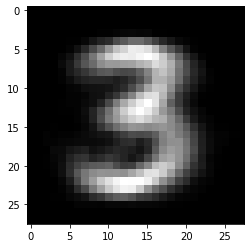

In [11]:
IMG = np.array(NewM[0], dtype='float')
pixels = IMG.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

### Image of 2nd mean from EM algorithm

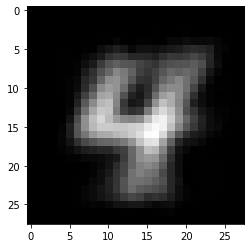

In [12]:
IMG = np.array(NewM[1], dtype='float')
pixels = IMG.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

### Image of 3rd mean from EM algorithm

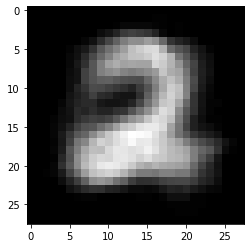

In [13]:
IMG = np.array(NewM[2], dtype='float')
pixels = IMG.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()